<a href="https://colab.research.google.com/github/JuanPedregal/Tarea_01/blob/main/Tarea_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
# Cargamos la base_tarea
from google.colab import files
uploaded = files.upload()

Saving base_tarea.xls to base_tarea.xls


In [4]:
# Instalamos pandas y convertimos la base en un DataFrame
import pandas as pd
df = pd.read_excel('base_tarea.xls')
df

,Year,ID,Name,State,County,Status,Type,Company Type,Production,Average Employees,Labor_Hours,date
0,2013,103381,Tacoa Highwall Miner,Alabama,Bibb,"Active, men working, not producing",Surface,Indepedent Producer Operator,56004,10,22392,2003-06-17
1,2013,103404,Reid School Mine,Alabama,Blount,Permanently abandoned,Surface,Indepedent Producer Operator,28807,18,28447,2005-09-21
2,2013,100759,North River #1 Underground Min,Alabama,Fayette,"Active, men working, not producing",Underground,Indepedent Producer Operator,1440115,183,474784,2001-01-13
3,2013,103246,Bear Creek,Alabama,Franklin,Active,Surface,Indepedent Producer Operator,87587,13,29193,2006-01-03
4,2013,103451,Knight Mine,Alabama,Franklin,Active,Surface,Indepedent Producer Operator,147499,27,46393,2007-05-21
...,...,...,...,...,...,...,...,...,...,...,...,...
1445,2013,1103254,Fidelity Mine,Refuse Recovery,Perry,"Active, men working, not producing",Refuse,Operating Subsidiary,18532,4,8249,2006-02-05
1446,2013,1102636,Wfi,Refuse Recovery,Saline,"Active, men working, not producing",Refuse,Indepedent Producer Operator,5070,4,1449,2007-02-07
1447,2013,4407233,Gobco #8,Refuse Recovery,Russell,Active,Refuse,Indepedent Producer Operator,377607,16,43684,2002-08-17
1448,2013,1518524,Turkey Pen Refuse,Refuse Recovery,Pike,Active,Refuse,Indepedent Producer Operator,7744,2,622,2002-08-16


In [ ]:
# Punto 1
(a,b) = (df.shape) #nombro a "a" como la cantidad de filas y "b" cantidad de columnas
print(df.head(a))

      Year       ID  ... Labor_Hours       date
0     2013   103381  ...       22392 2003-06-17
1     2013   103404  ...       28447 2005-09-21
2     2013   100759  ...      474784 2001-01-13
3     2013   103246  ...       29193 2006-01-03
4     2013   103451  ...       46393 2007-05-21
...    ...      ...  ...         ...        ...
1445  2013  1103254  ...        8249 2006-02-05
1446  2013  1102636  ...        1449 2007-02-07
1447  2013  4407233  ...       43684 2002-08-17
1448  2013  1518524  ...         622 2002-08-16
1449  2013  1519685  ...        1020 2005-09-28

[1450 rows x 12 columns]


In [ ]:
# Punto 2
print(df.dtypes)

Year                          int64
ID                            int64
Name                         object
State                        object
County                       object
Status                       object
Type                         object
Company Type                 object
Production                    int64
Average Employees             int64
Labor_Hours                   int64
date                 datetime64[ns]
dtype: object


In [ ]:
# Punto 3
# Una forma: a partir del df seleccionar las columnas que queremos
print(df[['County','Production','Labor_Hours']])
# Otra forma: crear un nuevo DataFrame usando usecols
df1 = pd.read_excel(('base_tarea.xls'), usecols = ['County','Production','Labor_Hours'])
print(df1)

        County  Production  Labor_Hours
0         Bibb       56004        22392
1       Blount       28807        28447
2      Fayette     1440115       474784
3     Franklin       87587        29193
4     Franklin      147499        46393
...        ...         ...          ...
1445     Perry       18532         8249
1446    Saline        5070         1449
1447   Russell      377607        43684
1448      Pike        7744          622
1449      Pike       17357         1020

[1450 rows x 3 columns]
        County  Production  Labor_Hours
0         Bibb       56004        22392
1       Blount       28807        28447
2      Fayette     1440115       474784
3     Franklin       87587        29193
4     Franklin      147499        46393
...        ...         ...          ...
1445     Perry       18532         8249
1446    Saline        5070         1449
1447   Russell      377607        43684
1448      Pike        7744          622
1449      Pike       17357         1020

[1450 rows x 3

In [ ]:
# Punto 4 (usamos describe porque sum () nos tiraba la suma)
print(df["Production"].describe ())

count    1.450000e+03
mean     6.792012e+05
std      4.414922e+06
min      0.000000e+00
25%      0.000000e+00
50%      3.060650e+04
75%      2.514752e+05
max      1.110055e+08
Name: Production, dtype: float64


In [ ]:
# Punto 5
# Instalamos numpy
import numpy as np
# Insertamos la columna con valores NaN a la derecha de la cuarta columna.
df.insert(4, "columna", np.nan ,allow_duplicates=False)
df

,Year,ID,Name,State,columna,County,Status,Type,Company Type,Production,Average Employees,Labor_Hours,date
0,2013,103381,Tacoa Highwall Miner,Alabama,NaN,Bibb,"Active, men working, not producing",Surface,Indepedent Producer Operator,56004,10,22392,2003-06-17
1,2013,103404,Reid School Mine,Alabama,NaN,Blount,Permanently abandoned,Surface,Indepedent Producer Operator,28807,18,28447,2005-09-21
2,2013,100759,North River #1 Underground Min,Alabama,NaN,Fayette,"Active, men working, not producing",Underground,Indepedent Producer Operator,1440115,183,474784,2001-01-13
3,2013,103246,Bear Creek,Alabama,NaN,Franklin,Active,Surface,Indepedent Producer Operator,87587,13,29193,2006-01-03
4,2013,103451,Knight Mine,Alabama,NaN,Franklin,Active,Surface,Indepedent Producer Operator,147499,27,46393,2007-05-21
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1445,2013,1103254,Fidelity Mine,Refuse Recovery,NaN,Perry,"Active, men working, not producing",Refuse,Operating Subsidiary,18532,4,8249,2006-02-05
1446,2013,1102636,Wfi,Refuse Recovery,NaN,Saline,"Active, men working, not producing",Refuse,Indepedent Producer Operator,5070,4,1449,2007-02-07
1447,2013,4407233,Gobco #8,Refuse Recovery,NaN,Russell,Active,Refuse,Indepedent Producer Operator,377607,16,43684,2002-08-17
1448,2013,1518524,Turkey Pen Refuse,Refuse Recovery,NaN,Pike,Active,Refuse,Indepedent Producer Operator,7744,2,622,2002-08-16


In [ ]:
# Punto 6 
df2 = pd.read_excel(('base_tarea.xls'), skiprows=[i for i in range(1,11)])
df2

,Year,ID,Name,State,County,Status,Type,Company Type,Production,Average Employees,Labor_Hours,date
0,2013,103180,Sloan Mountain Mine,Alabama,Jefferson,Active,Surface,Indepedent Producer Operator,327780,84,196963,2005-09-28
1,2013,103182,Fishtrap,Alabama,Jefferson,Active,Surface,Operating Subsidiary,175058,30,87314,2005-09-30
2,2013,103285,Narley Mine,Alabama,Jefferson,Active,Surface,Operating Subsidiary,154861,39,90584,2006-03-07
3,2013,103332,Powhatan Mine,Alabama,Jefferson,Active,Surface,Indepedent Producer Operator,140521,27,61394,2007-12-07
4,2013,103375,Johnson Mine,Alabama,Jefferson,Temporarily closed,Surface,Indepedent Producer Operator,580,2,1900,2002-12-07
...,...,...,...,...,...,...,...,...,...,...,...,...
1435,2013,1103254,Fidelity Mine,Refuse Recovery,Perry,"Active, men working, not producing",Refuse,Operating Subsidiary,18532,4,8249,2006-02-05
1436,2013,1102636,Wfi,Refuse Recovery,Saline,"Active, men working, not producing",Refuse,Indepedent Producer Operator,5070,4,1449,2007-02-07
1437,2013,4407233,Gobco #8,Refuse Recovery,Russell,Active,Refuse,Indepedent Producer Operator,377607,16,43684,2002-08-17
1438,2013,1518524,Turkey Pen Refuse,Refuse Recovery,Pike,Active,Refuse,Indepedent Producer Operator,7744,2,622,2002-08-16


In [ ]:
# Punto 7
# Sumamos estas dos columnas y nos quedamos con el valor
sum_row = df[["Production","Labor_Hours"]].sum()
# Creamos un DataFrame con estos valores para que queden en forma de fila
df_sum = pd.DataFrame(data=sum_row).T 
# Usamos reindex para "acoplar" las columnas que teniamos en df a las columnas de df_sum
df_sum = df_sum.reindex(columns=df.columns) 
# Agregamos esta fila en un nuevo DataFrame dentro de nuestro df
df_final=df.append(df_sum,ignore_index=True) 
df_final

,Year,ID,Name,State,columna,County,Status,Type,Company Type,Production,Average Employees,Labor_Hours,date
0,2013.0,103381.0,Tacoa Highwall Miner,Alabama,NaN,Bibb,"Active, men working, not producing",Surface,Indepedent Producer Operator,56004,10.0,22392,2003-06-17
1,2013.0,103404.0,Reid School Mine,Alabama,NaN,Blount,Permanently abandoned,Surface,Indepedent Producer Operator,28807,18.0,28447,2005-09-21
2,2013.0,100759.0,North River #1 Underground Min,Alabama,NaN,Fayette,"Active, men working, not producing",Underground,Indepedent Producer Operator,1440115,183.0,474784,2001-01-13
3,2013.0,103246.0,Bear Creek,Alabama,NaN,Franklin,Active,Surface,Indepedent Producer Operator,87587,13.0,29193,2006-01-03
4,2013.0,103451.0,Knight Mine,Alabama,NaN,Franklin,Active,Surface,Indepedent Producer Operator,147499,27.0,46393,2007-05-21
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1446,2013.0,1102636.0,Wfi,Refuse Recovery,NaN,Saline,"Active, men working, not producing",Refuse,Indepedent Producer Operator,5070,4.0,1449,2007-02-07
1447,2013.0,4407233.0,Gobco #8,Refuse Recovery,NaN,Russell,Active,Refuse,Indepedent Producer Operator,377607,16.0,43684,2002-08-17
1448,2013.0,1518524.0,Turkey Pen Refuse,Refuse Recovery,NaN,Pike,Active,Refuse,Indepedent Producer Operator,7744,2.0,622,2002-08-16
1449,2013.0,1519685.0,Fedscreek Refuse Pile,Refuse Recovery,NaN,Pike,"Active, men working, not producing",Refuse,Indepedent Producer Operator,17357,3.0,1020,2005-09-28


In [ ]:
# Punto 8
df3 =  df.head(n=10)
df3

,Year,ID,Name,State,columna,County,Status,Type,Company Type,Production,Average Employees,Labor_Hours,date
0,2013,103381,Tacoa Highwall Miner,Alabama,NaN,Bibb,"Active, men working, not producing",Surface,Indepedent Producer Operator,56004,10,22392,2003-06-17
1,2013,103404,Reid School Mine,Alabama,NaN,Blount,Permanently abandoned,Surface,Indepedent Producer Operator,28807,18,28447,2005-09-21
2,2013,100759,North River #1 Underground Min,Alabama,NaN,Fayette,"Active, men working, not producing",Underground,Indepedent Producer Operator,1440115,183,474784,2001-01-13
3,2013,103246,Bear Creek,Alabama,NaN,Franklin,Active,Surface,Indepedent Producer Operator,87587,13,29193,2006-01-03
4,2013,103451,Knight Mine,Alabama,NaN,Franklin,Active,Surface,Indepedent Producer Operator,147499,27,46393,2007-05-21
5,2013,103433,Crane Central Mine,Alabama,NaN,Jackson,Temporarily closed,Surface,Indepedent Producer Operator,69339,27,47195,2005-06-25
6,2013,100329,Concord Mine,Alabama,NaN,Jefferson,Active,Underground,Operating Subsidiary,0,59,144002,2006-02-05
7,2013,100851,Oak Grove Mine,Alabama,NaN,Jefferson,Active,Underground,Operating Subsidiary,2269014,447,1001809,2007-02-07
8,2013,102901,Shoal Creek Mine,Alabama,NaN,Jefferson,Active,Surface,Indepedent Producer Operator,0,5,12396,2002-08-17
9,2013,102901,Shoal Creek Mine,Alabama,NaN,Jefferson,Active,Underground,Indepedent Producer Operator,1453024,571,1237415,2002-08-16


In [ ]:
# Punto 9
df4 = df[['Labor_Hours','ID']].groupby('ID').sum() 
df4

,Labor_Hours
ID,
100329,144002
100347,215295
100515,6240
100759,474784
100851,1001809
...,...
4801353,2811138
4801429,161270
4801645,35687


In [ ]:
# Punto 10
# Creamos una columna que sea igual a nuestro indice así podamos usar query en función de ID
df4['ID'] = df4.index
print(df4.query('ID == 102976'))

        Labor_Hours      ID
ID                         
102976        38021  102976


In [ ]:
# Punto 11
print(df4.query('Labor_Hours >= 25000'))

         Labor_Hours       ID
ID                           
100329        144002   100329
100347        215295   100347
100759        474784   100759
100851       1001809   100851
101247       1551141   101247
...              ...      ...
4801353      2811138  4801353
4801429       161270  4801429
4801645        35687  4801645
4801646       661265  4801646
5000030       286079  5000030

[802 rows x 2 columns]


In [ ]:
# Punto 12
# Creando filtros boleanos
f2 = df["ID"].isin(["102976", "102901"])
df[f2]

,Year,ID,Name,State,columna,County,Status,Type,Company Type,Production,Average Employees,Labor_Hours,date
8,2013,102901,Shoal Creek Mine,Alabama,NaN,Jefferson,Active,Surface,Indepedent Producer Operator,0,5,12396,2002-08-17
9,2013,102901,Shoal Creek Mine,Alabama,NaN,Jefferson,Active,Underground,Indepedent Producer Operator,1453024,571,1237415,2002-08-16
18,2013,102976,Piney Woods Preparation Plant,Alabama,NaN,Shelby,Active,Surface,Indepedent Producer Operator,0,5,14828,2006-11-15
19,2013,102976,Piney Woods Preparation Plant,Alabama,NaN,Shelby,Active,Underground,Indepedent Producer Operator,0,9,23193,2007-08-10


In [ ]:
# Punto13
df.sort_values(by=["Labor_Hours"])

,Year,ID,Name,State,columna,County,Status,Type,Company Type,Production,Average Employees,Labor_Hours,date
837,2013,3608140,Bell Corp,Pennsylvania (Anthracite),NaN,Schuylkill,Temporarily closed,Surface,Indepedent Producer Operator,23,2,35,2005-09-21
213,2013,1519619,No. 1 Auger,Kentucky (East),NaN,Floyd,Temporarily closed,Surface,Indepedent Producer Operator,700,3,40,2005-07-24
1437,2013,3610027,Paradise Bank,Refuse Recovery,NaN,Northumberland,"New, under construction",Refuse,Indepedent Producer Operator,52,1,53,2005-07-24
740,2013,3609189,Ser #3163,Pennsylvania (Bituminous),NaN,Indiana,Active,Surface,Indepedent Producer Operator,574,1,54,2001-01-13
1433,2013,1519554,No 1,Refuse Recovery,NaN,Harlan,Permanently abandoned,Refuse,Indepedent Producer Operator,8586,1,133,2007-12-07
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1271,2013,4601437,Mcelroy Mine,West Virginia (Northern),NaN,Marshall,Active,Underground,Operating Subsidiary,9403070,957,2194378,2007-02-07
25,2013,101401,No 7 Mine,Alabama,NaN,Tuscaloosa,Active,Underground,Operating Subsidiary,5405412,989,2464719,2005-06-25
1413,2013,4801353,North Antelope Rochelle Mine,Wyoming,NaN,Campbell,Active,Surface,Operating Subsidiary,111005549,1349,2811138,2006-03-07
711,2013,3607230,Bailey Mine,Pennsylvania (Bituminous),NaN,Greene,Active,Underground,Operating Subsidiary,11321481,1222,3015772,2005-09-30


In [ ]:
# Punto 14
lista = [ df [(df["date"] >= "2005-02-01") & (df["date"] <= "2006-11-30")] ]
lista

[      Year       ID  ... Labor_Hours       date
 1     2013   103404  ...       28447 2005-09-21
 3     2013   103246  ...       29193 2006-01-03
 5     2013   103433  ...       47195 2005-06-25
 6     2013   100329  ...      144002 2006-02-05
 10    2013   103180  ...      196963 2005-09-28
 ...    ...      ...  ...         ...        ...
 1440  2013  3609405  ...        5670 2005-09-21
 1442  2013  3609337  ...        5175 2006-01-03
 1444  2013  1519713  ...         200 2005-06-25
 1445  2013  1103254  ...        8249 2006-02-05
 1449  2013  1519685  ...        1020 2005-09-28
 
 [745 rows x 13 columns]]

In [ ]:
# Punto 15 
print(df[df["date"].dt.year == 2005])

      Year       ID  ... Labor_Hours       date
1     2013   103404  ...       28447 2005-09-21
5     2013   103433  ...       47195 2005-06-25
10    2013   103180  ...      196963 2005-09-28
11    2013   103182  ...       87314 2005-09-30
16    2013   103432  ...         220 2005-12-24
...    ...      ...  ...         ...        ...
1436  2013  3609843  ...       13036 2005-12-24
1437  2013  3610027  ...          53 2005-07-24
1440  2013  3609405  ...        5670 2005-09-21
1444  2013  1519713  ...         200 2005-06-25
1449  2013  1519685  ...        1020 2005-09-28

[447 rows x 13 columns]


In [ ]:
# Punto 16
df.sort_values(by=['ID','date'], ascending=[0,1])


,Year,ID,Name,State,columna,County,Status,Type,Company Type,Production,Average Employees,Labor_Hours,date
48,2013,5000030,Usibelli,Alaska,NaN,Fairbanks North Star,Active,Surface,Indepedent Producer Operator,1631584,125,286079,2002-08-17
1420,2013,4801646,Bridger Underground Coal Mine,Wyoming,NaN,Sweetwater,Active,Underground,Operating Subsidiary,4442616,278,661265,2003-06-17
61,2013,4801645,Addcar System 18 Hwm Serial No,Colorado,NaN,Rio Blanco,Active,Surface,Indepedent Producer Operator,350060,17,35687,2001-01-13
1414,2013,4801429,Dry Fork Mine,Wyoming,NaN,Campbell,Active,Surface,Operating Subsidiary,5433936,78,161270,2007-12-07
1413,2013,4801353,North Antelope Rochelle Mine,Wyoming,NaN,Campbell,Active,Surface,Operating Subsidiary,111005549,1349,2811138,2006-03-07
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7,2013,100851,Oak Grove Mine,Alabama,NaN,Jefferson,Active,Underground,Operating Subsidiary,2269014,447,1001809,2007-02-07
2,2013,100759,North River #1 Underground Min,Alabama,NaN,Fayette,"Active, men working, not producing",Underground,Indepedent Producer Operator,1440115,183,474784,2001-01-13
1441,2013,100515,Mary Lee # 1 Mine,Refuse Recovery,NaN,Walker,"Active, men working, not producing",Refuse,Indepedent Producer Operator,8400,4,6240,2001-01-13
32,2013,100347,Choctaw Mine,Alabama,NaN,Walker,Active,Surface,Indepedent Producer Operator,537429,82,215295,2006-03-07


In [2]:
# Cargamos la base_tarea2
from google.colab import files
uploaded = files.upload()

In [ ]:
# Punto 17
for i in range (1,4) : #para cada i = 1, 2, 3
  if i != 1: #si i = 2 o 3
    df5 = pd.concat ( [df5, pd.read_excel("base_tarea2 (2).xls", sheet_name = "P"+str(i))]) # Concatenamos df5 con las otras dos hojas
  else: # si i = 1
    df5 = pd.read_excel("base_tarea2 (2).xls", sheet_name = "P"+str(i)) #Creamos la primera base
# Verificamos la dimension de df5
df5.shape

(4350, 12)

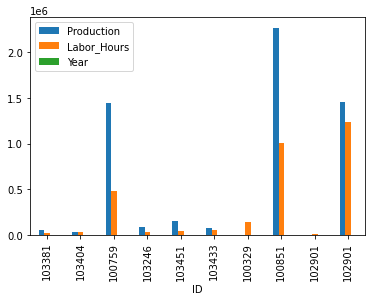

In [7]:
# Punto18

df6 = df.head(10)
df6.plot(x="ID", y=["Production","Labor_Hours","Year"], kind='bar')

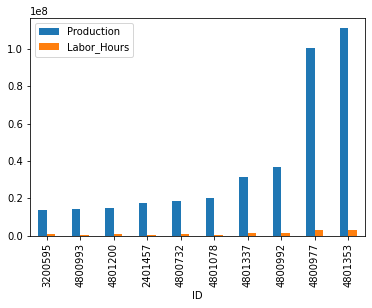

In [9]:
# Punto19

df7 = df.sort_values(by=["Production"])
df8 = df7.tail(10)
df8.plot(x="ID", y=["Production","Labor_Hours"], kind='bar')